## Import Data

In [2]:
hotel_data = read.csv("hotel_booking.csv")
table(hotel_data$is_canceled)
# data source - https://www.kaggle.com/datasets/mojtaba142/hotel-booking?resource=download


    0     1 
75166 44224 

## Extract 10000 Data and Set a Holdout Set

In [3]:
set.seed(1)
data = sample(nrow(hotel_data), size = 10000)
hotel_data = hotel_data[data, ]
in_train = sample(nrow(hotel_data), size = 8000)
train = hotel_data[in_train, ]
test = hotel_data[-in_train, ]
table(hotel_data$is_canceled)


   0    1 
6275 3725 

In [4]:
str(train)

'data.frame':	8000 obs. of  36 variables:
 $ hotel                         : chr  "City Hotel" "City Hotel" "City Hotel" "City Hotel" ...
 $ is_canceled                   : int  0 1 0 1 0 1 0 0 0 0 ...
 $ lead_time                     : int  59 26 0 97 4 56 52 124 207 56 ...
 $ arrival_date_year             : int  2017 2017 2016 2016 2017 2017 2017 2016 2017 2016 ...
 $ arrival_date_month            : chr  "March" "April" "February" "September" ...
 $ arrival_date_week_number      : int  12 14 8 40 4 5 9 24 33 47 ...
 $ arrival_date_day_of_month     : int  20 7 14 27 27 3 26 10 14 14 ...
 $ stays_in_weekend_nights       : int  1 0 2 0 0 0 2 1 1 1 ...
 $ stays_in_week_nights          : int  1 1 1 3 2 2 0 2 4 2 ...
 $ adults                        : int  2 1 2 3 2 2 2 2 2 2 ...
 $ children                      : num  0 0 0 0 0 0 2 0 0 0 ...
 $ babies                        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ meal                          : chr  "BB" "BB" "SC" "BB" ...
 $ country           

## Add Transformation Covariate

In [5]:
train$arrival_date_month <-as.integer(factor(train$arrival_date_month, levels = month.name))

In [6]:
train$reservation_status_date <- as.Date(train$reservation_status_date)
train$date <- as.Date(with(train, paste(arrival_date_year, arrival_date_month, arrival_date_day_of_month,sep="-")), "%Y-%m-%d")
train$abs_cancel_arrive_period = abs(difftime(train$date, train$reservation_status_date, units="days"))
train$abs_cancel_arrive_period = as.integer(train$abs_cancel_arrive_period)

In [7]:
head(train)
dim(train)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,⋯,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone.number,credit_card,date,abs_cancel_arrive_period
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<date>,<int>
108023,City Hotel,0,59,2017,3,12,20,1,1,2,⋯,0,2,Check-Out,2017-03-22,Austin Murray,Austin_Murray20@mail.com,150-231-3040,************5903,2017-03-20,2
65727,City Hotel,1,26,2017,4,14,7,0,1,1,⋯,0,0,Canceled,2017-03-28,John Miller,John_Miller@gmail.com,912-827-0272,************7193,2017-04-07,10
83973,City Hotel,0,0,2016,2,8,14,2,1,2,⋯,0,0,Check-Out,2016-02-17,Jon Jones,Jon.J98@yandex.com,747-511-4663,************7762,2016-02-14,3
57566,City Hotel,1,97,2016,9,40,27,0,3,3,⋯,0,2,Canceled,2016-09-13,Corey Brown,Brown.Corey@att.com,449-630-5717,************7623,2016-09-27,14
32490,Resort Hotel,0,4,2017,1,4,27,0,2,2,⋯,0,1,Check-Out,2017-01-29,Edward Hernandez,Edward.H@verizon.com,974-297-4980,************4063,2017-01-27,2
63237,City Hotel,1,56,2017,2,5,3,0,2,2,⋯,0,0,Canceled,2016-12-31,Paul Gregory,PaulGregory85@aol.com,955-421-5511,************7059,2017-02-03,34


[1] 8000   38

## Delete Columns with Fake Data

In [8]:
train <- train[,!names(hotel_data) %in% c("name", "email", "phone.number", "credit_card")]
head(train)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,⋯,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date,abs_cancel_arrive_period
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<date>,<date>,<int>
108023,City Hotel,0,59,2017,3,12,20,1,1,2,⋯,NA,0,Transient,106.20,0,2,Check-Out,2017-03-22,2017-03-20,2
65727,City Hotel,1,26,2017,4,14,7,0,1,1,⋯,NA,0,Transient,117.00,0,0,Canceled,2017-03-28,2017-04-07,10
83973,City Hotel,0,0,2016,2,8,14,2,1,2,⋯,NA,0,Transient,82.33,0,0,Check-Out,2016-02-17,2016-02-14,3
57566,City Hotel,1,97,2016,9,40,27,0,3,3,⋯,NA,0,Transient,168.30,0,2,Canceled,2016-09-13,2016-09-27,14
32490,Resort Hotel,0,4,2017,1,4,27,0,2,2,⋯,NA,0,Transient,70.00,0,1,Check-Out,2017-01-29,2017-01-27,2
63237,City Hotel,1,56,2017,2,5,3,0,2,2,⋯,NA,0,Transient,79.20,0,0,Canceled,2016-12-31,2017-02-03,34


## Change Variable Type

In [9]:
train[is.na(train)] <- 0
train$hotel <- as.factor(train$hotel)
train$is_canceled <- as.factor(train$is_canceled)
train$arrival_date_year <- as.factor(train$arrival_date_year)
train$arrival_date_month <- as.factor(train$arrival_date_month)
train$arrival_date_week_number <- as.factor(train$arrival_date_week_number)
train$arrival_date_day_of_month <- as.factor(train$arrival_date_day_of_month)
train$meal <- as.factor(train$meal)
train$country <- as.factor(train$country)
train$market_segment <- as.factor(train$market_segment)
train$distribution_channel <- as.factor(train$distribution_channel)
train$is_repeated_guest <- as.factor(train$is_repeated_guest)
train$reserved_room_type <- as.factor(train$reserved_room_type)
train$assigned_room_type <- as.factor(train$assigned_room_type)
train$deposit_type <- as.factor(train$deposit_type)
train$agent <- as.factor(train$agent)
train$company <- as.factor(train$company)
train$customer_type <- as.factor(train$customer_type)
train$reservation_status <- as.factor(train$reservation_status)
train$deposit_type <- as.factor(train$deposit_type)
train$reservation_status_date <- as.factor(train$reservation_status_date)
train$date <- as.factor(train$date)
str(train)

'data.frame':	8000 obs. of  34 variables:
 $ hotel                         : Factor w/ 2 levels "City Hotel","Resort Hotel": 1 1 1 1 2 1 1 1 2 1 ...
 $ is_canceled                   : Factor w/ 2 levels "0","1": 1 2 1 2 1 2 1 1 1 1 ...
 $ lead_time                     : int  59 26 0 97 4 56 52 124 207 56 ...
 $ arrival_date_year             : Factor w/ 3 levels "2015","2016",..: 3 3 2 2 3 3 3 2 3 2 ...
 $ arrival_date_month            : Factor w/ 12 levels "1","2","3","4",..: 3 4 2 9 1 2 2 6 8 11 ...
 $ arrival_date_week_number      : Factor w/ 53 levels "1","2","3","4",..: 12 14 8 40 4 5 9 24 33 47 ...
 $ arrival_date_day_of_month     : Factor w/ 31 levels "1","2","3","4",..: 20 7 14 27 27 3 26 10 14 14 ...
 $ stays_in_weekend_nights       : int  1 0 2 0 0 0 2 1 1 1 ...
 $ stays_in_week_nights          : int  1 1 1 3 2 2 0 2 4 2 ...
 $ adults                        : int  2 1 2 3 2 2 2 2 2 2 ...
 $ children                      : num  0 0 0 0 0 0 2 0 0 0 ...
 $ babies                 

In [10]:
# train[, c('hotel','arrival_date_year','arrival_date_month','arrival_date_week_number',
#                'arrival_date_day_of_month','meal','country','market_segment','distribution_channel',
#                'is_repeated_guest','reserved_room_type','assigned_room_type','deposit_type','agent','company',
#                'customer_type','reservation_status','reservation_status_date', 'date')]<- sapply(train[,
#                 c('hotel','arrival_date_year','arrival_date_month','arrival_date_week_number',
#                'arrival_date_day_of_month','meal','country','market_segment','distribution_channel',
#                'is_repeated_guest','reserved_room_type','assigned_room_type','deposit_type','agent','company',
#                'customer_type','reservation_status','reservation_status_date','date')], unclass)
# str(train)
# dim(train)

# Regression

## Baseline

In [11]:
# R program to implement
# K-fold cross-validation
library(caret)
defaultW <- getOption("warn") 
options(warn = -1) 

# setting seed to generate a
# reproducible random sampling
set.seed(1)
 
# defining training control
# as cross-validation and
# value of K equal to 10
train_control <- trainControl(method = "cv",
                              number = 10)
 
# training the model by assigning sales column
# as target variable and rest other column
# as independent variable
model <- train( lead_time ~.-date-abs_cancel_arrive_period, data = train,
               method = "lm",
               trControl = train_control)
 
# printing model performance metrics
# along with other details
print(model)

Loading required package: ggplot2

Loading required package: lattice



Linear Regression 

8000 samples
  33 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 7200, 7199, 7201, 7200, 7200, 7201, ... 
Resampling results:

  RMSE      Rsquared  MAE     
  67.78334  0.623349  48.39647

Tuning parameter 'intercept' was held constant at a value of TRUE


## Baseline + Transformed

In [12]:
# R program to implement
# K-fold cross-validation
library(caret)

# setting seed to generate a
# reproducible random sampling
set.seed(1)
 
# defining training control
# as cross-validation and
# value of K equal to 10
train_control <- trainControl(method = "cv",
                              number = 10)
 
# training the model by assigning sales column
# as target variable and rest other column
# as independent variable
model <- train( lead_time ~.-date, data = train,
               method = "lm",
               trControl = train_control)
 
# printing model performance metrics
# along with other details
print(model)

Linear Regression 

8000 samples
  33 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 7200, 7199, 7201, 7200, 7200, 7201, ... 
Resampling results:

  RMSE      Rsquared   MAE    
  79.14133  0.5410427  50.0115

Tuning parameter 'intercept' was held constant at a value of TRUE


## Lasso

Loading required package: Matrix

Loaded glmnet 4.1-4




Call:  cv.glmnet(x = x, y = y, nfolds = 10, alpha = 1) 

Measure: Mean-Squared Error 

    Lambda Index Measure    SE Nonzero
min 0.5509    52    3804 81.24     707
1se 0.8772    47    3863 87.04     438

[1] 61.67379

[1] 0.5508934

1452 x 1 sparse Matrix of class "dgCMatrix"
                                             s0
(Intercept)                       -1.537960e+00
hotelCity Hotel                    2.566261e+00
hotelResort Hotel                 -1.355513e+00
is_canceled1                      -2.757194e+00
arrival_date_year2016              2.587786e+01
arrival_date_year2017              4.216593e+01
arrival_date_month2               -2.096355e+01
arrival_date_month3               -1.793889e+01
arrival_date_month4                .           
arrival_date_month5                5.071178e+00
arrival_date_month6                1.933223e+01
arrival_date_month7                3.352627e+01
arrival_date_month8                2.772800e+01
arrival_date_month9                2.952255e+01
arrival_date_month10               1.914752e+01
arrival_date_month11               .           
arrival_date_month12               .           
arrival_date_week_number2         -2.460080e+01
arrival_date_week_number3         -2.804826e

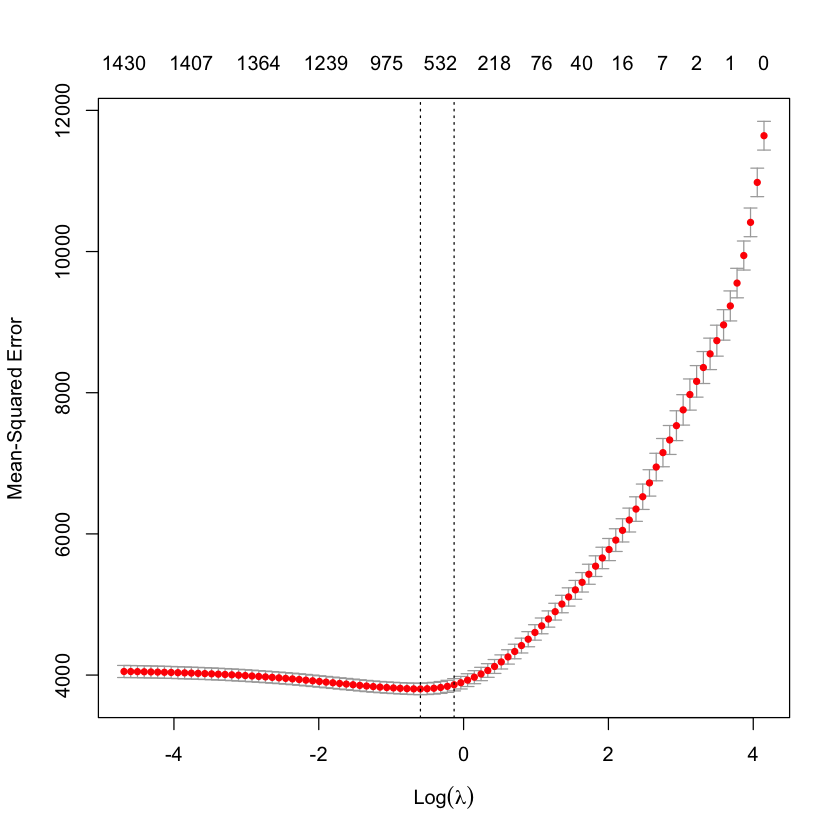

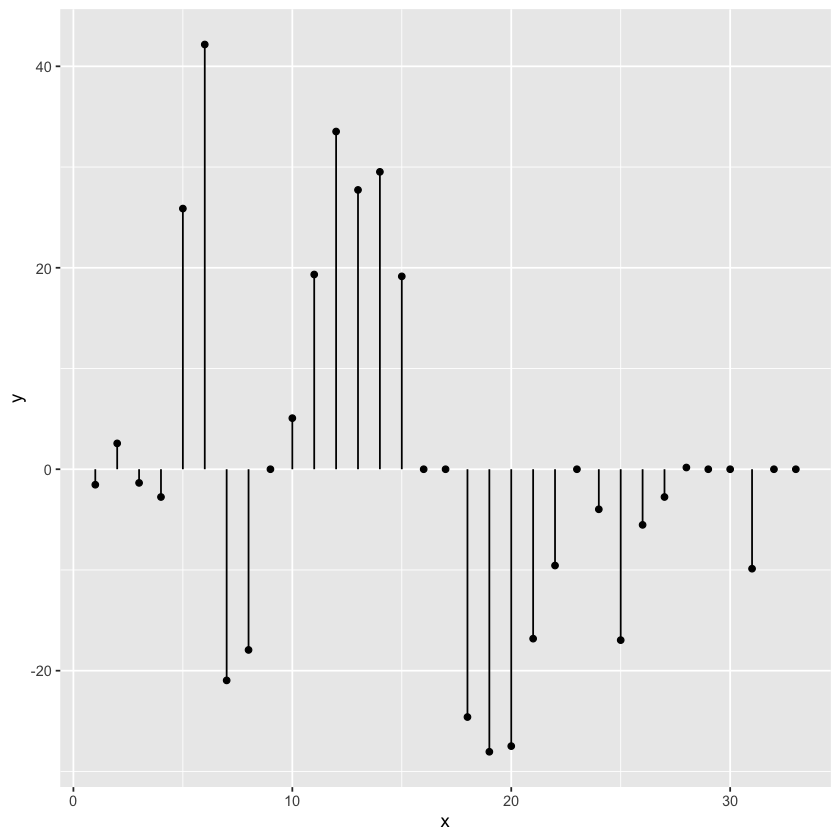

In [13]:
library(glmnet)
library(ggplot2)

set.seed(1)

# define response variable
y <- train$lead_time

# define matrix of predictor variables
x <- model.matrix( ~.-1, train[ -c(3,33)])

#perform k-fold cross-validation to find optimal lambda value
cv_lasso <- cv.glmnet(x, y, alpha = 1, nfolds = 10)
cv_lasso
sqrt(min(cv_lasso$cvm))

#find optimal lambda value that minimizes test MSE (from CV)
best_lambda_lasso <- cv_lasso$lambda.min
best_lambda_lasso

#produce plot of test MSE (from CV) by lambda value
plot(cv_lasso) 

#find coefficients of best model
best_lasso <- glmnet(x, y, alpha = 1, lambda = best_lambda_lasso)
coef(best_lasso)


# Create data for lollipop plot
data <- data.frame(x=seq(1,33), y=coef(best_lasso)[1:33])
 
# Plot
ggplot(data, aes(x=x, y=y)) +
  geom_point() + 
  geom_segment( aes(x=x, xend=x, y=0, yend=y))


## Ridge


Call:  cv.glmnet(x = x, y = y, nfolds = 10, alpha = 0) 

Measure: Mean-Squared Error 

    Lambda Index Measure    SE Nonzero
min  8.373    97    3987 69.30    1451
1se 21.229    87    4043 62.42    1451

[1] 63.14234

[1] 8.37309

1452 x 1 sparse Matrix of class "dgCMatrix"
                                             s0
(Intercept)                         52.35754206
hotelCity Hotel                      4.98074189
hotelResort Hotel                   -4.76290983
is_canceled1                         0.01278691
arrival_date_year2016               10.56701219
arrival_date_year2017               21.15445127
arrival_date_month2                -12.16164745
arrival_date_month3                -13.53436277
arrival_date_month4                 -0.50438346
arrival_date_month5                 -1.82959790
arrival_date_month6                  7.01753499
arrival_date_month7                 13.55520693
arrival_date_month8                  8.46658192
arrival_date_month9                 16.23205891
arrival_date_month10                 7.21171631
arrival_date_month11                 6.91235725
arrival_date_month12                -3.56898799
arrival_date_week_number2          -19.17414849
arrival_date_week_number3          -21.16974

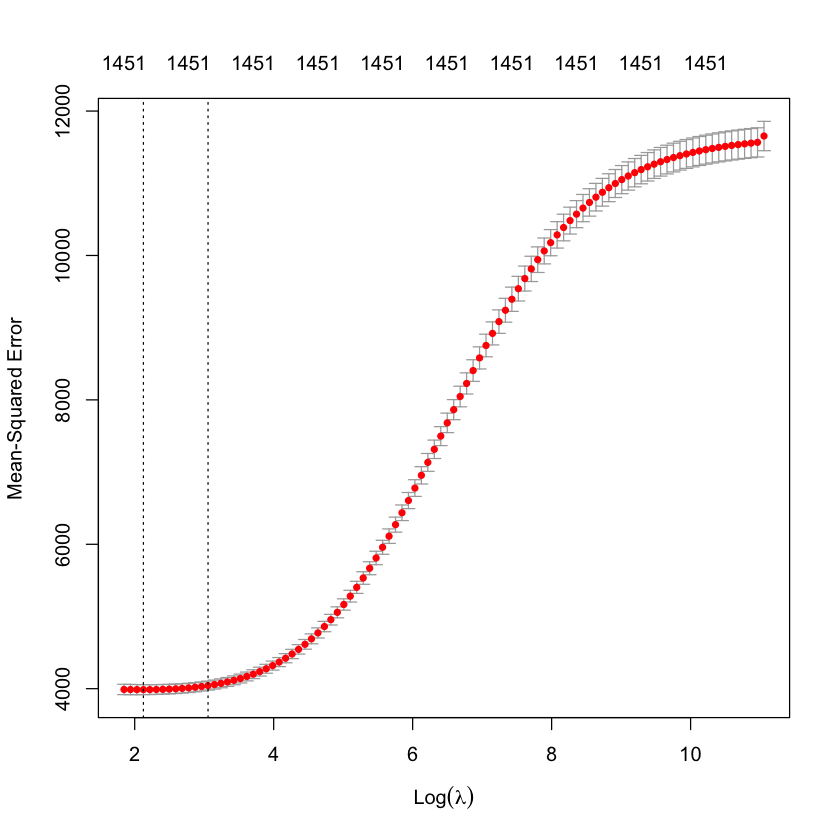

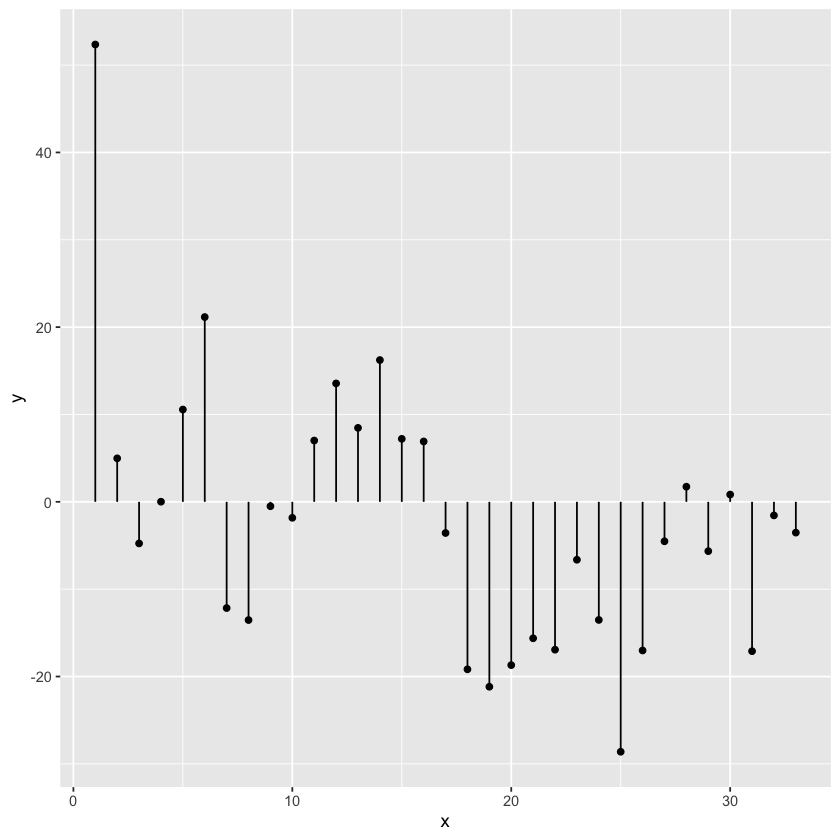

In [14]:
library(glmnet)
library(ggplot2)

set.seed(1)

#define response variable
y <- train$lead_time


#define matrix of predictor variables
x <- model.matrix( ~.-1, train[ -c(3,33)])


#perform k-fold cross-validation to find optimal lambda value
cv_ridge <- cv.glmnet(x, y, alpha = 0, nfolds = 10)
cv_ridge
sqrt(min(cv_ridge$cvm))

#find optimal lambda value that minimizes test MSE
best_lambda_ridge <- cv_ridge$lambda.min
best_lambda_ridge

#produce plot of test MSE (from CV) by lambda value
plot(cv_ridge) 

#find coefficients of best model
best_ridge <- glmnet(x, y, alpha = 0, lambda = best_lambda_ridge)
coef(best_ridge)


# Create data for lillpop plot
data <- data.frame(x=seq(1,33), y=coef(best_ridge)[1:33])
 
# Plot
ggplot(data, aes(x=x, y=y)) +
  geom_point() + 
  geom_segment( aes(x=x, xend=x, y=0, yend=y))



# Classification

## Baseline

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




Generalized Linear Model 

8000 samples
  33 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 7200, 7200, 7200, 7200, 7200, 7200, ... 
Resampling results:

  Accuracy   Kappa    
  0.8216229  0.6150546



Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.5901  -0.5012  -0.0578   0.1387   3.6398  

Coefficients: (3 not defined because of singularities)
                                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    -2.775e+00  1.386e+00  -2.003 0.045225 *  
`hotelResort Hotel`            -5.576e-01  2.446e-01  -2.280 0.022602 *  
lead_time                       4.892e-03  5.632e-04   8.686  < 2e-16 ***
arrival_date_year2016           9.476e-01  1.502e-01   6.311 2.78e-10 ***
arrival_date_year2017           1.127e+00  1.885e-01   5.977 2.28e-09 ***
arrival_date_month2             1.913e+00  8.462e-01   2.261 0.023761 *  
arrival_date_month3             2.769e+00  1.343e+00   2.062 0.039204 *  
arrival_date_month4             3.767e+00  1.901e+00   1.981 0.047593 *  
arrival_date_month5             5.278e+00  2.451e+00   2.153 0.031280 *  
arrival_date_month6             6.535e+00  2.987e+00   2.188 0.028668 *  
arri

Setting levels: control = 0, case = 1

Setting direction: controls < cases



NULL

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 4507  680
         1  475 2338
                                          
               Accuracy : 0.8556          
                 95% CI : (0.8477, 0.8633)
    No Information Rate : 0.6228          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6886          
                                          
 Mcnemar's Test P-Value : 1.942e-09       
                                          
            Sensitivity : 0.9047          
            Specificity : 0.7747          
         Pos Pred Value : 0.8689          
         Neg Pred Value : 0.8311          
             Prevalence : 0.6228          
         Detection Rate : 0.5634          
   Detection Prevalence : 0.6484          
      Balanced Accuracy : 0.8397          
                                          
       'Positive' Class : 0               
                        

[1] 0.2253148

[1] 0.09534324

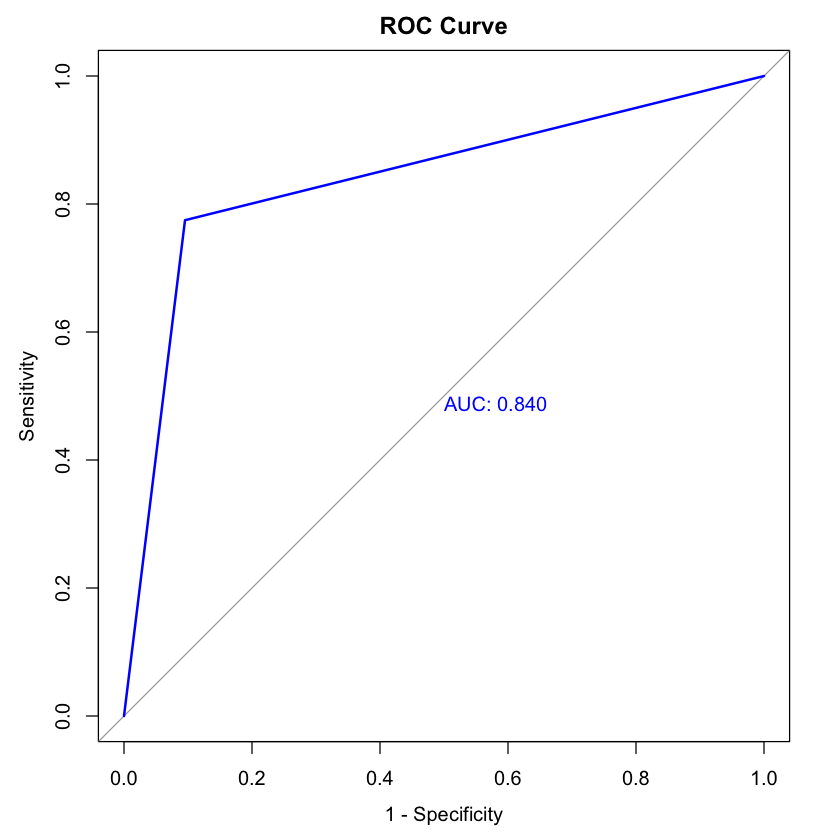

In [15]:
library(caret)
library(pROC)

set.seed(1)

# Set up 10-fold CV
train_model <- trainControl(method = "cv", number = 10)

# Train the model
glm_base <- train(
    is_canceled ~ .-abs_cancel_arrive_period-date-reservation_status_date-reservation_status, 
    data = train, 
    method = "glm",
    family = "binomial",
    trControl = train_model)
glm_base
summary(glm_base)

# generate ROC curve using cross-validated predictions
roc_data <- roc(train$is_canceled, as.numeric(predict(glm_base)))

# plot ROC curve
plot(roc_data, main = "ROC Curve", col = "blue", print.auc = TRUE, legacy.axes = TRUE)

head(glm_base$pred)

cm = confusionMatrix(predict(glm_base), train$is_canceled)
cm

FNR = cm$table[1,2]/ (cm$table[1,2] + cm$table[2,2])
FNR
FPR = cm$table[2,1]/ (cm$table[1,1] + cm$table[2,1])
FPR




## Baseline + Transformed

Generalized Linear Model 

8000 samples
  33 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 7200, 7200, 7200, 7200, 7200, 7200, ... 
Resampling results:

  Accuracy   Kappa    
  0.9277478  0.8437335



Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8194  -0.2559  -0.0001   0.0000   3.7279  

Coefficients: (3 not defined because of singularities)
                                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    -1.729e+00  1.861e+00  -0.929 0.352813    
`hotelResort Hotel`            -6.298e-01  3.396e-01  -1.854 0.063711 .  
lead_time                      -4.300e-03  1.108e-03  -3.882 0.000103 ***
arrival_date_year2016           5.366e-01  2.262e-01   2.372 0.017694 *  
arrival_date_year2017           1.806e-01  2.978e-01   0.607 0.544169    
arrival_date_month2             2.308e+00  1.282e+00   1.801 0.071746 .  
arrival_date_month3             3.018e+00  2.102e+00   1.436 0.151138    
arrival_date_month4             3.631e+00  3.072e+00   1.182 0.237256    
arrival_date_month5             4.778e+00  3.995e+00   1.196 0.231629    
arrival_date_month6             5.093e+00  4.893e+00   1.041 0.297932    
arri

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 4909  307
         1   73 2711
                                          
               Accuracy : 0.9525          
                 95% CI : (0.9476, 0.9571)
    No Information Rate : 0.6228          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8973          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9853          
            Specificity : 0.8983          
         Pos Pred Value : 0.9411          
         Neg Pred Value : 0.9738          
             Prevalence : 0.6228          
         Detection Rate : 0.6136          
   Detection Prevalence : 0.6520          
      Balanced Accuracy : 0.9418          
                                          
       'Positive' Class : 0               
                        

[1] 0.101723

[1] 0.01465275

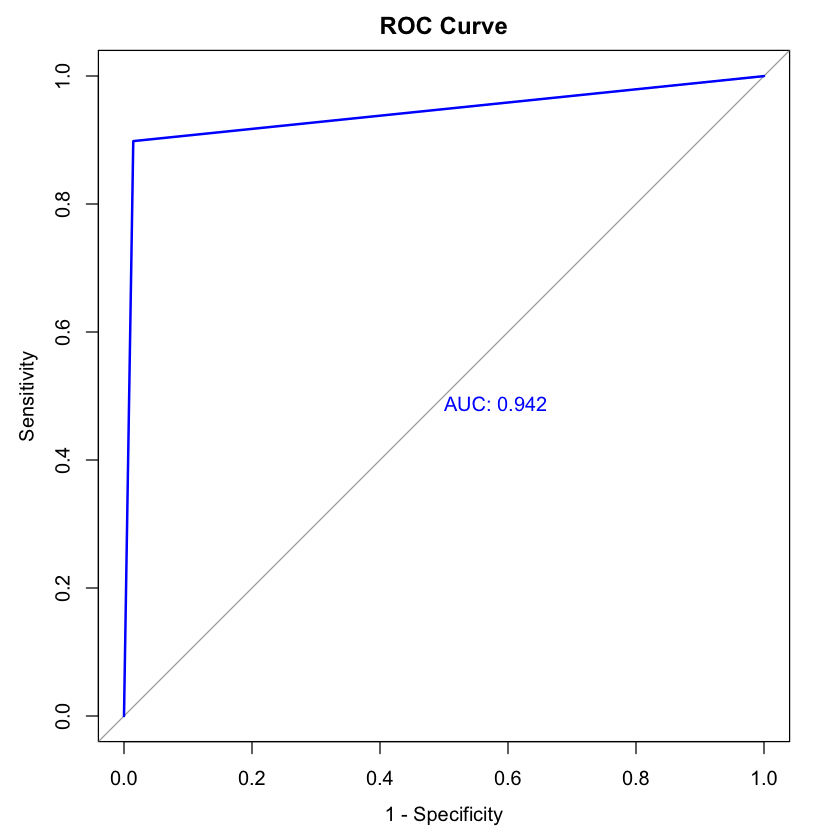

In [16]:
library(caret)
library(pROC)

set.seed(1)

# Set up 10-fold CV
train_model <- trainControl(method = "cv", number = 10)

# Train the model
glm_full <- train(
    is_canceled ~ .-date-reservation_status_date-reservation_status, 
    data = train, 
    method = "glm",
    family= "binomial",
    trControl = train_model)
glm_full
summary(glm_full)

# generate ROC curve using cross-validated predictions
roc_data <- roc(train$is_canceled, as.numeric(predict(glm_full)))

# plot ROC curve
plot(roc_data, main = "ROC Curve", col = "blue", print.auc = TRUE, legacy.axes = TRUE)

cm = confusionMatrix(predict(glm_full), train$is_canceled)
cm

FNR = cm$table[1,2]/ (cm$table[1,2] + cm$table[2,2])
FNR
FPR = cm$table[2,1]/ (cm$table[1,1] + cm$table[2,1])
FPR


## Removed low-corr

Generalized Linear Model 

8000 samples
  33 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 7200, 7200, 7200, 7200, 7200, 7200, ... 
Resampling results:

  Accuracy   Kappa    
  0.9298726  0.8480571



Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4528  -0.2826  -0.0001   0.0000   3.9065  

Coefficients: (3 not defined because of singularities)
                                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    -2.405e+00  1.729e+00  -1.391 0.164181    
`hotelResort Hotel`            -5.835e-01  3.121e-01  -1.869 0.061571 .  
lead_time                      -4.486e-03  9.699e-04  -4.626 3.73e-06 ***
arrival_date_year2016           4.076e-01  1.835e-01   2.222 0.026303 *  
arrival_date_year2017           6.541e-02  2.060e-01   0.318 0.750786    
stays_in_weekend_nights        -1.291e-01  7.094e-02  -1.820 0.068756 .  
stays_in_week_nights           -1.829e-01  3.956e-02  -4.624 3.76e-06 ***
adults                         -2.203e-03  1.309e-01  -0.017 0.986573    
children                       -1.799e-01  1.851e-01  -0.972 0.331049    
babies                         -1.139e+00  7.694e-01  -1.481 0.138666    
meal

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 4918  320
         1   64 2698
                                          
               Accuracy : 0.952           
                 95% CI : (0.9471, 0.9566)
    No Information Rate : 0.6228          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8961          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9872          
            Specificity : 0.8940          
         Pos Pred Value : 0.9389          
         Neg Pred Value : 0.9768          
             Prevalence : 0.6228          
         Detection Rate : 0.6148          
   Detection Prevalence : 0.6548          
      Balanced Accuracy : 0.9406          
                                          
       'Positive' Class : 0               
                        

[1] 0.1060305

[1] 0.01284625

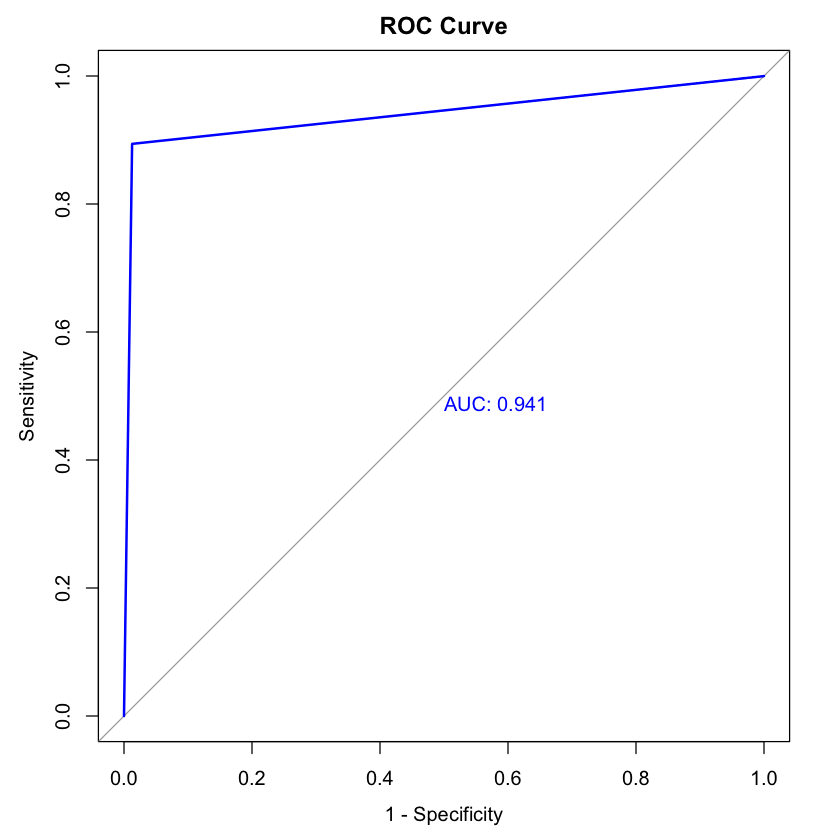

In [17]:
library(caret)
library(pROC)

set.seed(1)

# Set up 10-fold CV
train_model <- trainControl(method = "cv", number = 10)

# Train the model
glm_low <- train(
  is_canceled ~ .-arrival_date_day_of_month-adr-arrival_date_week_number-arrival_date_month-
    date-reservation_status_date-reservation_status, 
  data = train, 
  method = "glm",
  family = "binomial",
  trControl = train_model)
glm_low
summary(glm_low)


# generate ROC curve using cross-validated predictions
roc_data <- roc(train$is_canceled, as.numeric(predict(glm_low)))

# plot ROC curve
plot(roc_data, main = "ROC Curve", col = "blue", print.auc = TRUE, legacy.axes = TRUE)

# generate confusion matrix
cm <- confusionMatrix(predict(glm_low), train$is_canceled)
cm

# calculate FPR and FNR
FNR <- cm$table[1,2]/ (cm$table[1,2] + cm$table[2,2])
FNR
FPR <- cm$table[2,1]/ (cm$table[1,1] + cm$table[2,1])
FPR


## KNN

In [18]:
library(caret)
library(pROC)

set.seed(1)

trControl <- trainControl(method  = "cv",
                          number  = 10)
knn <- train(is_canceled ~ .-date-reservation_status_date-reservation_status,
             method     = "knn",
             tuneGrid   = expand.grid(k = 1:10),
             trControl  = trControl,
             metric     = "Accuracy",
             data       = train)
knn
summary(knn)


cm=confusionMatrix( predict(knn),train$is_canceled )
cm

FNR = cm$table[1,2]/ (cm$table[1,2] + cm$table[2,2])
FNR
FPR = cm$table[2,1]/ (cm$table[1,1] + cm$table[2,1])
FPR 


k-Nearest Neighbors 

8000 samples
  33 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 7200, 7200, 7200, 7200, 7200, 7200, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.9158747  0.8193136
   2  0.9083742  0.8027663
   3  0.9206245  0.8266486
   4  0.9189987  0.8227201
   5  0.9222490  0.8292501
   6  0.9212486  0.8268910
   7  0.9192487  0.8220017
   8  0.9168736  0.8163517
   9  0.9166242  0.8154591
  10  0.9144984  0.8104481

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 5.

            Length Class      Mode     
learn         2    -none-     list     
k             1    -none-     numeric  
theDots       0    -none-     list     
xNames      603    -none-     character
problemType   1    -none-     character
tuneValue     1    data.frame list     
obsLevels     2    -none-     character
param         0    -none-     list     

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 4937  468
         1   45 2550
                                          
               Accuracy : 0.9359          
                 95% CI : (0.9303, 0.9411)
    No Information Rate : 0.6228          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8596          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9910          
            Specificity : 0.8449          
         Pos Pred Value : 0.9134          
         Neg Pred Value : 0.9827          
             Prevalence : 0.6228          
         Detection Rate : 0.6171          
   Detection Prevalence : 0.6756          
      Balanced Accuracy : 0.9179          
                                          
       'Positive' Class : 0               
                        

[1] 0.1550696

[1] 0.009032517

## SVM 

In [19]:
library(e1071)

set.seed(1)


folds = createFolds(train$is_canceled, k = 10)

cv = lapply(folds, function(x) { 
  
  train_fold = train[-x, ] # training fold =  training set minus (-) it's sub test fold
  test_fold = train[x, ] 
 
  classifier = svm(formula = is_canceled ~ .-date-reservation_status_date-reservation_status,
                   data = train_fold,
                   type = 'C-classification',
                   kernel = 'radial')
 
  y_pred = predict(classifier, newdata = test_fold[-2])
  cm = table(test_fold[, 2], y_pred)
  return (cm)

})
cv


$Fold01
   y_pred
      0   1
  0 498   0
  1  91 210

$Fold02
   y_pred
      0   1
  0 498   0
  1 115 187

$Fold03
   y_pred
      0   1
  0 498   0
  1 107 195

$Fold04
   y_pred
      0   1
  0 499   0
  1 108 194

$Fold05
   y_pred
      0   1
  0 497   1
  1 110 192

$Fold06
   y_pred
      0   1
  0 498   0
  1 100 201

$Fold07
   y_pred
      0   1
  0 498   0
  1 107 195

$Fold08
   y_pred
      0   1
  0 498   0
  1 118 184

$Fold09
   y_pred
      0   1
  0 499   0
  1 109 193

$Fold10
   y_pred
      0   1
  0 497   1
  1 110 192


# Best Model for Regression : Lasso (on whole training set)

In [20]:
y <- train$lead_time
x <- model.matrix( ~.-1, train[ -c(3,33)])
best_reg <- glmnet(x, y, alpha = 1, lambda = best_lambda_lasso)
coef(best_reg)

1452 x 1 sparse Matrix of class "dgCMatrix"
                                             s0
(Intercept)                       -1.537960e+00
hotelCity Hotel                    2.566261e+00
hotelResort Hotel                 -1.355513e+00
is_canceled1                      -2.757194e+00
arrival_date_year2016              2.587786e+01
arrival_date_year2017              4.216593e+01
arrival_date_month2               -2.096355e+01
arrival_date_month3               -1.793889e+01
arrival_date_month4                .           
arrival_date_month5                5.071178e+00
arrival_date_month6                1.933223e+01
arrival_date_month7                3.352627e+01
arrival_date_month8                2.772800e+01
arrival_date_month9                2.952255e+01
arrival_date_month10               1.914752e+01
arrival_date_month11               .           
arrival_date_month12               .           
arrival_date_week_number2         -2.460080e+01
arrival_date_week_number3         -2.804826e

# Best Model for Classification : Baseline + Transformed (on whole training set)

In [21]:
best_class <- glm(is_canceled ~ .-date-reservation_status_date-reservation_status,
                  data = train, family = "binomial")
summary(best_class)


Call:
glm(formula = is_canceled ~ . - date - reservation_status_date - 
    reservation_status, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8194  -0.2559  -0.0001   0.0000   3.7279  

Coefficients: (3 not defined because of singularities)
                                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    -1.729e+00  1.861e+00  -0.929 0.352813    
hotelResort Hotel              -6.298e-01  3.396e-01  -1.854 0.063711 .  
lead_time                      -4.300e-03  1.108e-03  -3.882 0.000103 ***
arrival_date_year2016           5.366e-01  2.262e-01   2.372 0.017694 *  
arrival_date_year2017           1.806e-01  2.978e-01   0.607 0.544169    
arrival_date_month2             2.308e+00  1.282e+00   1.801 0.071746 .  
arrival_date_month3             3.018e+00  2.102e+00   1.436 0.151138    
arrival_date_month4             3.631e+00  3.072e+00   1.182 0.237256    
arrival_date_month5             